In [1]:
%load_ext autoreload 

%autoreload 2 

# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the instructions file located under spec/coursework1.pdf. The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats_t1(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
        title,
        notebook=True
):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig = plt.figure(figsize=(8, 4))
    plt.suptitle(title)
    ax_1 = fig.add_subplot(121)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
#     fig_2 = plt.figure(figsize=(4, 4))
    ax_2 = fig.add_subplot(122)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]] * 100, label=f'{k} %')
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    fig.tight_layout()
    return stats, keys, run_time, fig, ax_1, ax_2

In [3]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdd0a9d60d0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdd0a9d64f0>)


Epoch 1: 2.4s to complete
    error(train)=8.21e-01, acc(train)=7.52e-01, error(valid)=8.39e-01, acc(valid)=7.44e-01


Epoch 2: 2.2s to complete
    error(train)=6.50e-01, acc(train)=7.95e-01, error(valid)=6.84e-01, acc(valid)=7.85e-01


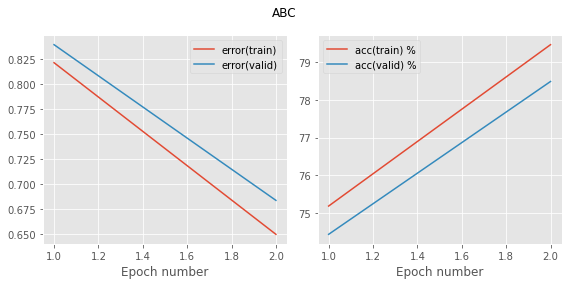

In [49]:
# # The model set up code below is provided as a starting point.
# # You will probably want to add further code cells for the
# # different experiments you run.

# from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
# from mlp.errors import CrossEntropySoftmaxError
# from mlp.models import MultipleLayerModel
# from mlp.initialisers import ConstantInit, GlorotUniformInit
# from mlp.learning_rules import AdamLearningRule
# from mlp.optimisers import Optimiser

# #setup hyperparameters
# learning_rate = 0.1
# num_epochs = 2
# stats_interval = 1
# input_dim, output_dim, hidden_dim = 784, 47, 100

# weights_init = GlorotUniformInit(rng=rng)
# biases_init = ConstantInit(0.)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
# ])

# error = CrossEntropySoftmaxError()
# # Use a basic gradient descent learning rule
# learning_rule = AdamLearningRule()

# #Remember to use notebook=False when you write a script to be run in a terminal
# _ = train_model_and_plot_stats_t1(
#     model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 'ABC',
    notebook=True)

# Task 1

In [51]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)

#Set up fixed hyperparameter for task 1
batch_size = 100
learning_rate = 0.01
num_epochs = 100
stats_interval = 10
input_dim, output_dim = 784, 47


# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f0db77158b0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f0db7715880>)


## 32-Unit 1-Hidden Layer

Epoch 10: 1.7s to complete
    error(train)=7.06e-01, acc(train)=7.82e-01, error(valid)=7.54e-01, acc(valid)=7.71e-01


Epoch 20: 1.7s to complete
    error(train)=6.27e-01, acc(train)=7.99e-01, error(valid)=7.04e-01, acc(valid)=7.79e-01


Epoch 30: 1.5s to complete
    error(train)=5.70e-01, acc(train)=8.16e-01, error(valid)=6.64e-01, acc(valid)=7.91e-01


Epoch 40: 1.5s to complete
    error(train)=5.38e-01, acc(train)=8.25e-01, error(valid)=6.47e-01, acc(valid)=7.97e-01


Epoch 50: 1.5s to complete
    error(train)=5.27e-01, acc(train)=8.26e-01, error(valid)=6.53e-01, acc(valid)=7.94e-01


Epoch 60: 1.5s to complete
    error(train)=5.28e-01, acc(train)=8.23e-01, error(valid)=6.64e-01, acc(valid)=7.90e-01


Epoch 70: 1.5s to complete
    error(train)=4.97e-01, acc(train)=8.36e-01, error(valid)=6.42e-01, acc(valid)=7.99e-01


Epoch 80: 1.5s to complete
    error(train)=4.97e-01, acc(train)=8.35e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


Epoch 90: 1.5s to complete
    error(train)=4.85e-01, acc(train)=8.37e-01, error(valid)=6.47e-01, acc(valid)=7.99e-01


Epoch 100: 1.9s to complete
    error(train)=4.81e-01, acc(train)=8.40e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


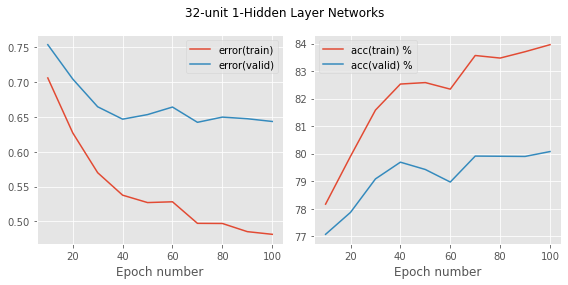

In [52]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters

hidden_dim = 32

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1

# stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')
# fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer-error.pdf')
# fig_2.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer-acc.pdf')

In [14]:
# fig_1.savefig(f'../images/t1_{hidden_dim}_unit_error.pdf')
# fig_2.savefig(f'../images/t1_{hidden_dim}_unit_acc.pdf')

## 64-unit 1-Hidden Layer

Epoch 10: 2.2s to complete
    error(train)=4.79e-01, acc(train)=8.41e-01, error(valid)=5.64e-01, acc(valid)=8.18e-01


Epoch 20: 2.8s to complete
    error(train)=3.98e-01, acc(train)=8.64e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


Epoch 30: 2.3s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


Epoch 40: 2.2s to complete
    error(train)=3.35e-01, acc(train)=8.79e-01, error(valid)=5.89e-01, acc(valid)=8.18e-01


Epoch 50: 2.5s to complete
    error(train)=3.13e-01, acc(train)=8.85e-01, error(valid)=6.11e-01, acc(valid)=8.21e-01


Epoch 60: 2.2s to complete
    error(train)=2.86e-01, acc(train)=8.95e-01, error(valid)=6.30e-01, acc(valid)=8.22e-01


Epoch 70: 2.5s to complete
    error(train)=2.78e-01, acc(train)=8.97e-01, error(valid)=6.67e-01, acc(valid)=8.15e-01


Epoch 80: 2.3s to complete
    error(train)=2.67e-01, acc(train)=9.01e-01, error(valid)=7.02e-01, acc(valid)=8.15e-01


Epoch 90: 2.3s to complete
    error(train)=2.57e-01, acc(train)=9.03e-01, error(valid)=7.36e-01, acc(valid)=8.16e-01


Epoch 100: 2.2s to complete
    error(train)=2.58e-01, acc(train)=9.01e-01, error(valid)=7.69e-01, acc(valid)=8.09e-01


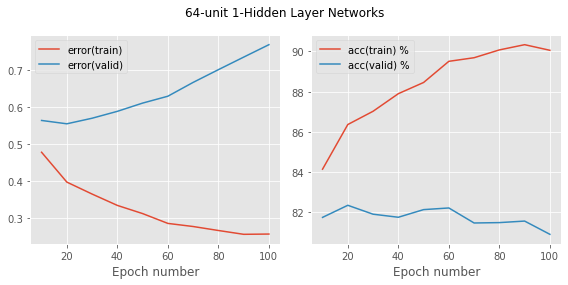

In [53]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
# stats_interval = 10
# input_dim, output_dim, 
hidden_dim = 64

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1

stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

In [11]:
# fig_1.savefig(f'../images/t1_{hidden_dim}_unit_error.pdf')
# fig_2.savefig(f'../images/t1_{hidden_dim}_unit_acc.pdf')

In [54]:
print(learning_rate)

0.01


# 128-Unit 1-Hidden Layer

Epoch 10: 3.9s to complete
    error(train)=3.28e-01, acc(train)=8.83e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


Epoch 20: 3.9s to complete
    error(train)=2.41e-01, acc(train)=9.05e-01, error(valid)=5.48e-01, acc(valid)=8.37e-01


Epoch 30: 4.0s to complete
    error(train)=1.86e-01, acc(train)=9.26e-01, error(valid)=6.37e-01, acc(valid)=8.31e-01


Epoch 40: 5.1s to complete
    error(train)=1.72e-01, acc(train)=9.30e-01, error(valid)=7.68e-01, acc(valid)=8.28e-01


Epoch 50: 4.3s to complete
    error(train)=1.37e-01, acc(train)=9.43e-01, error(valid)=8.69e-01, acc(valid)=8.26e-01


Epoch 60: 4.2s to complete
    error(train)=1.27e-01, acc(train)=9.47e-01, error(valid)=1.01e+00, acc(valid)=8.25e-01


Epoch 70: 4.6s to complete
    error(train)=1.24e-01, acc(train)=9.48e-01, error(valid)=1.16e+00, acc(valid)=8.20e-01


Epoch 80: 4.0s to complete
    error(train)=1.20e-01, acc(train)=9.50e-01, error(valid)=1.29e+00, acc(valid)=8.16e-01


Epoch 90: 4.1s to complete
    error(train)=1.04e-01, acc(train)=9.56e-01, error(valid)=1.43e+00, acc(valid)=8.19e-01


Epoch 100: 4.1s to complete
    error(train)=9.31e-02, acc(train)=9.62e-01, error(valid)=1.53e+00, acc(valid)=8.16e-01


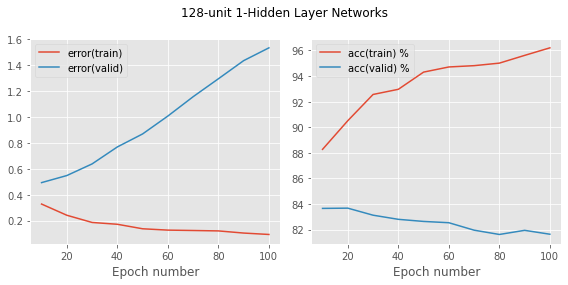

In [55]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
# stats_interval = 10
# input_dim, output_dim, 
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 1

stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

# 128-Unit 2-Hidden Layer

Epoch 10: 4.9s to complete
    error(train)=3.31e-01, acc(train)=8.77e-01, error(valid)=5.20e-01, acc(valid)=8.32e-01


Epoch 20: 5.3s to complete
    error(train)=2.29e-01, acc(train)=9.10e-01, error(valid)=5.76e-01, acc(valid)=8.38e-01


Epoch 30: 5.1s to complete
    error(train)=1.77e-01, acc(train)=9.27e-01, error(valid)=7.15e-01, acc(valid)=8.37e-01


Epoch 40: 5.0s to complete
    error(train)=1.56e-01, acc(train)=9.37e-01, error(valid)=8.72e-01, acc(valid)=8.31e-01


Epoch 50: 5.3s to complete
    error(train)=1.43e-01, acc(train)=9.43e-01, error(valid)=1.02e+00, acc(valid)=8.26e-01


Epoch 60: 4.8s to complete
    error(train)=1.41e-01, acc(train)=9.43e-01, error(valid)=1.17e+00, acc(valid)=8.21e-01


Epoch 70: 5.0s to complete
    error(train)=1.32e-01, acc(train)=9.49e-01, error(valid)=1.31e+00, acc(valid)=8.21e-01


Epoch 80: 4.7s to complete
    error(train)=1.13e-01, acc(train)=9.54e-01, error(valid)=1.41e+00, acc(valid)=8.21e-01


Epoch 90: 4.8s to complete
    error(train)=1.53e-01, acc(train)=9.44e-01, error(valid)=1.64e+00, acc(valid)=8.17e-01


Epoch 100: 5.0s to complete
    error(train)=1.33e-01, acc(train)=9.52e-01, error(valid)=1.77e+00, acc(valid)=8.17e-01


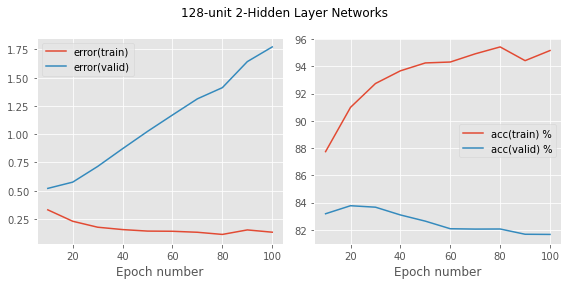

In [56]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
# stats_interval = 10
input_dim, output_dim, 
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 2
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

# 128-Unit 3-Hidden Layer

Epoch 10: 5.9s to complete
    error(train)=3.20e-01, acc(train)=8.81e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


Epoch 20: 6.6s to complete
    error(train)=2.34e-01, acc(train)=9.06e-01, error(valid)=5.77e-01, acc(valid)=8.35e-01


Epoch 30: 6.8s to complete
    error(train)=1.92e-01, acc(train)=9.21e-01, error(valid)=6.94e-01, acc(valid)=8.37e-01


Epoch 40: 7.3s to complete
    error(train)=1.58e-01, acc(train)=9.33e-01, error(valid)=7.89e-01, acc(valid)=8.33e-01


Epoch 50: 6.4s to complete
    error(train)=1.63e-01, acc(train)=9.33e-01, error(valid)=9.27e-01, acc(valid)=8.30e-01


Epoch 60: 6.6s to complete
    error(train)=1.49e-01, acc(train)=9.40e-01, error(valid)=1.08e+00, acc(valid)=8.32e-01


Epoch 70: 8.0s to complete
    error(train)=1.38e-01, acc(train)=9.46e-01, error(valid)=1.16e+00, acc(valid)=8.27e-01


Epoch 80: 6.7s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=1.25e+00, acc(valid)=8.28e-01


Epoch 90: 6.7s to complete
    error(train)=1.34e-01, acc(train)=9.48e-01, error(valid)=1.40e+00, acc(valid)=8.23e-01


Epoch 100: 5.3s to complete
    error(train)=1.16e-01, acc(train)=9.55e-01, error(valid)=1.44e+00, acc(valid)=8.27e-01


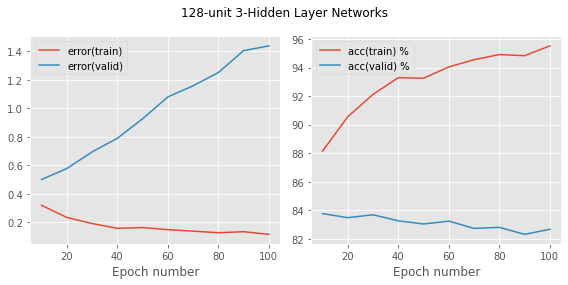

In [57]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
# stats_interval = 10
# input_dim, output_dim, 
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'{hidden_dim}-unit {n_hidden_layer}-Hidden Layer Networks',
    notebook=True)

fig_1.savefig(f'../images/t1-{hidden_dim}-unit-{n_hidden_layer}-hlayer.pdf')

# Task 2

In [6]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)

#Fixed hyperparameter for task 1
batch_size = 100
learning_rate = 0.01
num_epochs = 100
stats_interval = 10
input_dim, output_dim = 784, 47


# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdd2d7885e0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fdd2d7883d0>)


# Using Dropout on 128-Unit 3-Hidden Layer Networks

Epoch 10: 7.4s to complete
    error(train)=2.39e+00, acc(train)=7.69e-01, error(valid)=2.74e+00, acc(valid)=7.55e-01


Epoch 20: 6.2s to complete
    error(train)=1.92e+00, acc(train)=8.03e-01, error(valid)=2.45e+00, acc(valid)=7.83e-01


Epoch 30: 6.1s to complete
    error(train)=1.71e+00, acc(train)=8.12e-01, error(valid)=2.27e+00, acc(valid)=7.90e-01


Epoch 40: 6.4s to complete
    error(train)=1.59e+00, acc(train)=8.23e-01, error(valid)=2.11e+00, acc(valid)=8.00e-01


Epoch 50: 6.0s to complete
    error(train)=1.46e+00, acc(train)=8.30e-01, error(valid)=2.05e+00, acc(valid)=8.04e-01


Epoch 60: 6.0s to complete
    error(train)=1.46e+00, acc(train)=8.34e-01, error(valid)=2.08e+00, acc(valid)=8.05e-01


Epoch 70: 6.0s to complete
    error(train)=1.38e+00, acc(train)=8.34e-01, error(valid)=2.06e+00, acc(valid)=8.07e-01


Epoch 80: 7.4s to complete
    error(train)=1.33e+00, acc(train)=8.33e-01, error(valid)=2.03e+00, acc(valid)=8.05e-01


Epoch 90: 6.3s to complete
    error(train)=1.32e+00, acc(train)=8.40e-01, error(valid)=2.04e+00, acc(valid)=8.08e-01


Epoch 100: 6.4s to complete
    error(train)=1.39e+00, acc(train)=8.39e-01, error(valid)=2.15e+00, acc(valid)=8.08e-01


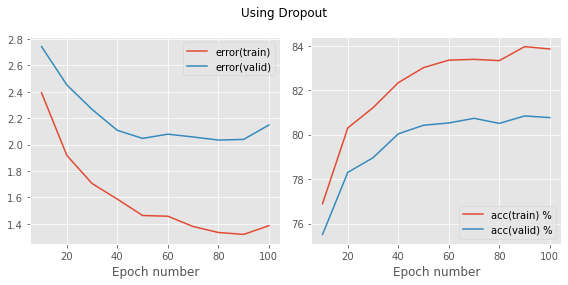

In [20]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
# stats_interval = 10
# input_dim, output_dim, 
hidden_dim = 128

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8, share_across_batch=True),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),

    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'Using Dropout',
    notebook=True)

fig_1.savefig(f'../images/t2-dropout-input-08-hidden-05.png')

# Using Dropout And L2 Regularization on 128-Unit 3-Hidden Layer Networks

Epoch 10: 6.6s to complete
    error(train)=2.39e+00, acc(train)=7.68e-01, error(valid)=2.74e+00, acc(valid)=7.55e-01


Epoch 20: 11.0s to complete
    error(train)=2.00e+00, acc(train)=8.00e-01, error(valid)=2.44e+00, acc(valid)=7.83e-01


Epoch 30: 12.0s to complete
    error(train)=1.65e+00, acc(train)=8.17e-01, error(valid)=2.13e+00, acc(valid)=7.96e-01


Epoch 40: 13.2s to complete
    error(train)=1.61e+00, acc(train)=8.19e-01, error(valid)=2.13e+00, acc(valid)=7.96e-01


Epoch 50: 11.2s to complete
    error(train)=1.46e+00, acc(train)=8.26e-01, error(valid)=1.98e+00, acc(valid)=8.01e-01


Epoch 60: 11.9s to complete
    error(train)=1.49e+00, acc(train)=8.33e-01, error(valid)=2.03e+00, acc(valid)=8.06e-01


Epoch 70: 11.4s to complete
    error(train)=1.42e+00, acc(train)=8.36e-01, error(valid)=2.03e+00, acc(valid)=8.07e-01


Epoch 80: 10.7s to complete
    error(train)=1.38e+00, acc(train)=8.34e-01, error(valid)=1.97e+00, acc(valid)=8.08e-01


Epoch 90: 14.3s to complete
    error(train)=1.29e+00, acc(train)=8.41e-01, error(valid)=1.93e+00, acc(valid)=8.11e-01


Epoch 100: 10.8s to complete
    error(train)=1.42e+00, acc(train)=8.41e-01, error(valid)=2.07e+00, acc(valid)=8.10e-01


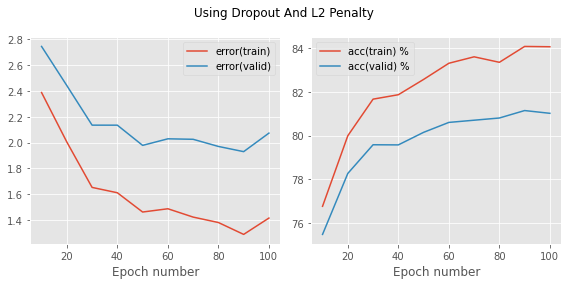

In [22]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
# stats_interval = 10
# input_dim, output_dim, 
hidden_dim = 128
l2_coefficient = 0.00001

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)

l2_penalty = L2Penalty(l2_coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8, share_across_batch=True),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l2_penalty, biases_penalty=l2_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),

    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'Using Dropout And L2 Penalty',
    notebook=True)

fig_1.savefig(f'../images/t2-dropout-l2-{l2_coefficient}.png')

Epoch 10: 8.0s to complete
    error(train)=2.50e+00, acc(train)=7.63e-01, error(valid)=2.80e+00, acc(valid)=7.52e-01


Epoch 20: 8.5s to complete
    error(train)=2.04e+00, acc(train)=7.97e-01, error(valid)=2.43e+00, acc(valid)=7.83e-01


Epoch 30: 7.8s to complete
    error(train)=1.74e+00, acc(train)=8.03e-01, error(valid)=2.11e+00, acc(valid)=7.87e-01


Epoch 40: 7.8s to complete
    error(train)=1.68e+00, acc(train)=8.12e-01, error(valid)=2.09e+00, acc(valid)=7.94e-01


Epoch 50: 7.7s to complete
    error(train)=1.54e+00, acc(train)=8.24e-01, error(valid)=1.96e+00, acc(valid)=8.06e-01


Epoch 60: 7.8s to complete
    error(train)=1.59e+00, acc(train)=8.27e-01, error(valid)=2.10e+00, acc(valid)=8.04e-01


Epoch 70: 7.7s to complete
    error(train)=1.50e+00, acc(train)=8.30e-01, error(valid)=2.00e+00, acc(valid)=8.07e-01


Epoch 80: 8.9s to complete
    error(train)=1.46e+00, acc(train)=8.28e-01, error(valid)=1.94e+00, acc(valid)=8.07e-01


Epoch 90: 8.5s to complete
    error(train)=1.39e+00, acc(train)=8.37e-01, error(valid)=1.87e+00, acc(valid)=8.17e-01


Epoch 100: 9.3s to complete
    error(train)=1.49e+00, acc(train)=8.36e-01, error(valid)=2.00e+00, acc(valid)=8.16e-01


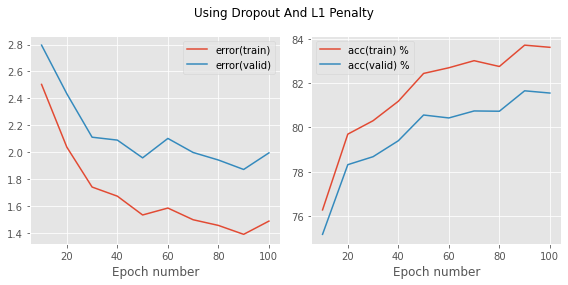

In [19]:
#setup hyperparameters
# learning_rate = 0.1
# num_epochs = 100
stats_interval = 10
# input_dim, output_dim, 
hidden_dim = 128
l1_coefficient = 0.00001

# Reset random number generator and data provider states on each run
# to ensure reproducibility of results
rng.seed(seed)
train_data.reset()
valid_data.reset()

# Alter data-provider batch size
train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

# Create a weights initialiser 
weights_init = GlorotUniformInit(rng=rng)

biases_init = ConstantInit(0.)

l1_penalty = L1Penalty(l1_coefficient)

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.8, share_across_batch=True),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),
    
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),

    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, 
                weights_penalty=l1_penalty, biases_penalty=l1_penalty), 
    ReluLayer(),
    DropoutLayer(rng=rng, incl_prob=0.5, share_across_batch=True),

    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

# Remember to use notebook=False when you write a script to be run in a terminal
n_hidden_layer = 3
stats, keys, run_time, fig_1, ax_1, ax_2 = train_model_and_plot_stats_t1(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, 
    title=f'Using Dropout And L1 Penalty',
    notebook=True)

fig_1.savefig(f'../images/t2-dropout-l1-{l1_coefficient}.pdf')